## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

c:\users\prashant\anaconda3\envs\dl38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\prashant\anaconda3\envs\dl38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\prashant\anaconda3\envs\dl38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [4]:
train_data = pd.read_csv("../train_data.csv")
valid_data = pd.read_csv("../valid_data.csv")

In [5]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


# Required Preprocessing 

In [6]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [7]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

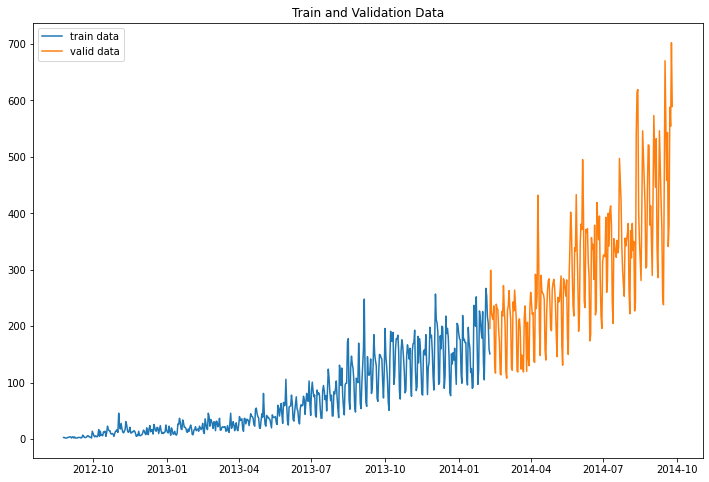

In [8]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train data')
plt.plot(valid_data.index, valid_data['count'], label='valid data')

plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Feature Extraction from Datetime

<img src='features.png'>

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
valid_data['Date'] = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')

In [8]:
train_data['Date'].dt.year.head()

Date
2012-08-25    2012
2012-08-26    2012
2012-08-27    2012
2012-08-28    2012
2012-08-29    2012
Name: Date, dtype: int64

In [9]:
train_data['Date'].dt.day.head()

Date
2012-08-25    25
2012-08-26    26
2012-08-27    27
2012-08-28    28
2012-08-29    29
Name: Date, dtype: int64

In [10]:
train_data['Date'].dt.dayofweek.head()

Date
2012-08-25    5
2012-08-26    6
2012-08-27    0
2012-08-28    1
2012-08-29    2
Name: Date, dtype: int64

The day of the week with Monday=0, Sunday=6.

# Adding features to the data

In [11]:
data_feat = pd.DataFrame({"year": train_data['Date'].dt.year,
                          "month": train_data['Date'].dt.month,
                          "day": train_data['Date'].dt.day,
                          "hour": train_data['Date'].dt.hour,
                          "dayofyear": train_data['Date'].dt.dayofyear,
                          "week": train_data['Date'].dt.week,
                          "quarter": train_data['Date'].dt.quarter,
                         })
data_feat.head()

,year,month,day,hour,dayofyear,week,quarter
Date,,,,,,,
2012-08-25,2012,8,25,0,238,34,3
2012-08-26,2012,8,26,0,239,34,3
2012-08-27,2012,8,27,0,240,35,3
2012-08-28,2012,8,28,0,241,35,3
2012-08-29,2012,8,29,0,242,35,3


In [12]:
complete_train_data = pd.concat([data_feat, train_data['count']], axis=1)
complete_train_data.head()

,year,month,day,hour,dayofyear,week,quarter,count
Date,,,,,,,,
2012-08-25,2012,8,25,0,238,34,3,3
2012-08-26,2012,8,26,0,239,34,3,3
2012-08-27,2012,8,27,0,240,35,3,2
2012-08-28,2012,8,28,0,241,35,3,2
2012-08-29,2012,8,29,0,242,35,3,2


In [13]:
valid_feat = pd.DataFrame({"year": valid_data['Date'].dt.year,
                          "month": valid_data['Date'].dt.month,
                          "day": valid_data['Date'].dt.day,
                          "hour": valid_data['Date'].dt.hour,
                          "dayofyear": valid_data['Date'].dt.dayofyear,
                          "week": valid_data['Date'].dt.week,
                          "quarter": valid_data['Date'].dt.quarter,
                         })
valid_feat.head()

,year,month,day,hour,dayofyear,week,quarter
Date,,,,,,,
2014-03-26,2014,3,26,0,85,13,1
2014-03-27,2014,3,27,0,86,13,1
2014-03-28,2014,3,28,0,87,13,1
2014-03-29,2014,3,29,0,88,13,1
2014-03-30,2014,3,30,0,89,13,1


In [14]:
complete_valid_data = pd.concat([valid_feat, valid_data['count']], axis=1)
complete_valid_data.head()

,year,month,day,hour,dayofyear,week,quarter,count
Date,,,,,,,,
2014-03-26,2014,3,26,0,85,13,1,198
2014-03-27,2014,3,27,0,86,13,1,120
2014-03-28,2014,3,28,0,87,13,1,207
2014-03-29,2014,3,29,0,88,13,1,145
2014-03-30,2014,3,30,0,89,13,1,130


# next video --- video break here -- 

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

#### Creating train and valid sets

In [16]:
x_train = complete_train_data.drop('count', axis=1)
y_train = complete_train_data['count']
x_valid = complete_valid_data.drop('count', axis=1)
y_valid = complete_valid_data['count']

In [17]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((578, 7), (578,), (184, 7), (184,))

#### Training Linear regression model

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predictions and evaluation

In [43]:
preds_valid = model.predict(x_valid)

In [44]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(y_valid, preds_valid))
print('The RMSE value for Linear Regressoin is', rmse)

The RMSE value for Linear Regressoin is 143.85178069184803
